In [1]:
#import necessary libraries
import os
import numpy as np
from google.colab import drive
import tensorflow as tf

In [2]:
#1.GPU ရွေးပါ
device_name=tf.test.gpu_device_name()
if device_name != "/device:GPU:0":
  raise SystemError("GPU device not found")
print(f"Device name is {device_name}")

Device name is /device:GPU:0


#2.Data Understanding

In [24]:
#connect colab to google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [25]:
train_dir="/content/drive/MyDrive/Dogandcat/train"
test_dir="/content/drive/MyDrive/Dogandcat/test"

In [26]:
os.listdir(train_dir+"/cat")

['cat1.png', 'cat2.png', 'cat3.png', 'cat4.png', 'cat5.png']

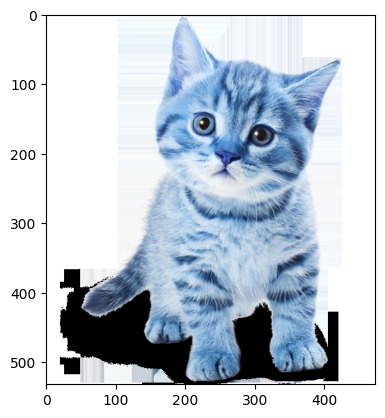

In [28]:
import cv2
image = cv2.imread(train_dir+"/cat"+"/cat1.png")

import matplotlib.pyplot as plt
plt.imshow(image)

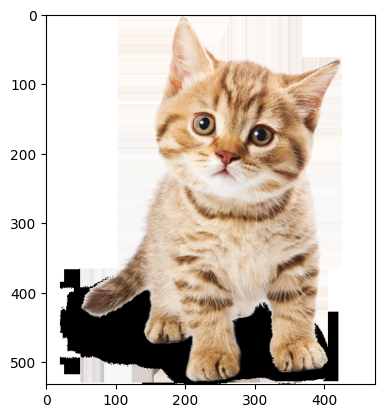

In [29]:
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image_rgb)

#3.Data Preprocessing

In [30]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
#In this step, we process all the images to get target size.
# All images will be rescaled by 1./255.
datagen_train = ImageDataGenerator( rescale = 1.0/255. )
datagen_test  = ImageDataGenerator( rescale = 1.0/255. )
batch_size = 5
train_set = datagen_train.flow_from_directory(train_dir,
                                            target_size = (100,100),
                                             batch_size = batch_size,
                                            class_mode = "categorical",
                                            shuffle = True)
test_set = datagen_test.flow_from_directory(test_dir,
                                       target_size = (100,100),
                                       batch_size = batch_size,
                                       class_mode = "categorical",
                                       shuffle = False)

Found 15 images belonging to 3 classes.
Found 15 images belonging to 3 classes.


#4.Modelling

In [64]:
import tensorflow as tf

model = tf.keras.models.Sequential([
    # 3 sets of conv and pool layers with L2 regularization
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', input_shape=(100, 100, 3), kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(100, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)),  # hidden layers with L2 regularization
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(200, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)),  # hidden layers with L2 regularization
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(3, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()


Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_42 (Conv2D)          (None, 98, 98, 64)        1792      
                                                                 
 max_pooling2d_42 (MaxPooli  (None, 49, 49, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_43 (Conv2D)          (None, 47, 47, 64)        36928     
                                                                 
 max_pooling2d_43 (MaxPooli  (None, 23, 23, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_44 (Conv2D)          (None, 21, 21, 64)        36928     
                                                                 
 max_pooling2d_44 (MaxPooli  (None, 10, 10, 64)      

In [66]:

num_of_training_images = 15
history = model.fit(train_set,
                    steps_per_epoch=num_of_training_images//batch_size,
                    epochs=200,
                    verbose = 2,
                    shuffle = True)

Epoch 1/200
3/3 - 0s - loss: 1.4979 - accuracy: 0.2000 - 460ms/epoch - 153ms/step
Epoch 2/200
3/3 - 0s - loss: 1.3310 - accuracy: 0.5333 - 458ms/epoch - 153ms/step
Epoch 3/200
3/3 - 0s - loss: 1.3017 - accuracy: 0.7333 - 452ms/epoch - 151ms/step
Epoch 4/200
3/3 - 0s - loss: 1.3990 - accuracy: 0.2667 - 440ms/epoch - 147ms/step
Epoch 5/200
3/3 - 0s - loss: 1.2589 - accuracy: 0.6000 - 440ms/epoch - 147ms/step
Epoch 6/200
3/3 - 0s - loss: 1.3298 - accuracy: 0.4000 - 433ms/epoch - 144ms/step
Epoch 7/200
3/3 - 0s - loss: 1.2073 - accuracy: 0.8000 - 440ms/epoch - 147ms/step
Epoch 8/200
3/3 - 0s - loss: 1.1170 - accuracy: 0.6000 - 437ms/epoch - 146ms/step
Epoch 9/200
3/3 - 0s - loss: 1.0771 - accuracy: 0.5333 - 463ms/epoch - 154ms/step
Epoch 10/200
3/3 - 1s - loss: 1.0618 - accuracy: 0.6667 - 550ms/epoch - 183ms/step
Epoch 11/200
3/3 - 1s - loss: 1.0221 - accuracy: 0.6000 - 609ms/epoch - 203ms/step
Epoch 12/200
3/3 - 1s - loss: 0.9265 - accuracy: 0.6000 - 600ms/epoch - 200ms/step
Epoch 13/200


#5.Evaluation

In [67]:
# Class Labels
class_dictionary = test_set.class_indices
print('Labels dictionary',class_dictionary)  #evaluation စမ်းရင် unseen testing data နဲ့စမ်း

Labels dictionary {'cat': 0, 'dog': 1, 'tiger': 2}


In [69]:
y_predicted = model.predict(test_set) # A way to predict data

3/3 [==============================] - 1s 209ms/step


In [70]:
y_predicted

array([[2.94700861e-01, 4.37769115e-01, 2.67529994e-01],
       [1.40542332e-02, 9.84513223e-01, 1.43255852e-03],
       [8.61828148e-01, 7.23820701e-02, 6.57897219e-02],
       [6.53237464e-07, 9.99999285e-01, 9.22982224e-08],
       [1.50964148e-02, 9.63756740e-01, 2.11469326e-02],
       [1.25754403e-03, 1.31573945e-01, 8.67168486e-01],
       [5.52973233e-06, 9.99966025e-01, 2.85178376e-05],
       [3.72354465e-04, 8.95687521e-01, 1.03940114e-01],
       [9.98933101e-04, 9.97858703e-01, 1.14233990e-03],
       [1.85673162e-02, 8.32916915e-01, 1.48515731e-01],
       [2.97683440e-11, 1.48779367e-09, 1.00000000e+00],
       [2.31234553e-05, 6.50515940e-05, 9.99911785e-01],
       [4.54618821e-05, 3.78505206e-07, 9.99954104e-01],
       [2.19443411e-01, 7.65697122e-01, 1.48594156e-02],
       [9.38037292e-09, 8.05866148e-06, 9.99991894e-01]], dtype=float32)

In [71]:
y_pred = []
for i in  y_predicted:
  y_pred.append(np.argmax(i))

In [72]:
y_pred

[1, 1, 0, 1, 1, 2, 1, 1, 1, 1, 2, 2, 2, 1, 2]

In [73]:
y_test = test_set.classes.tolist()
y_test

[0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2]

In [74]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test,y_pred)
print('confusion_matrix')
print(confusion_matrix)

confusion_matrix
[[1 4 0]
 [0 4 1]
 [0 1 4]]


In [75]:
from sklearn.metrics import accuracy_score, precision_score, f1_score, recall_score

print('Accuracy Score',accuracy_score(y_test,y_pred)*100,'%')
print('Precision Macro Score ',precision_score(y_test,y_pred,average = 'macro')*100,'%')
print('Recall_Score',recall_score(y_test,y_pred, average = 'macro')*100,'%')
print('F1_Score',f1_score(y_test,y_pred, average = 'macro')*100,'%')

Accuracy Score 60.0 %
Precision Macro Score  74.81481481481481 %
Recall_Score 60.0 %
F1_Score 56.82539682539684 %
